<a href="https://colab.research.google.com/github/ToobaObeidy-1/DA_bootcamp_python/blob/main/HPAC_machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # *High Pressure Air Compressor ML Model*

# Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Load data

In [23]:
#data will not be saved in real time
data = pd.read_excel("CIP.Cleandata (1).xlsx")
df = pd.DataFrame(data)

df


,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure,delivery_air_temp
0,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,44.34749
2,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,44.34749
3,0.578355,1.498506,5.101081,19.999228,26,28.500000,0.292201,0.272934,44.34749
4,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,44.34749
...,...,...,...,...,...,...,...,...,...
1779,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1780,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1781,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1782,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749


# Data Evaluation

In [24]:
# mean of all the columns
df.mean()

,0
sp1,0.382201
sp2,1.353584
sp3,4.889440
sp4,19.805439
cw_temp,28.000561
cw_outlet_temp,30.760386
lube_oil_pressure,0.292383
sw_pressure,0.272381
delivery_air_temp,41.444507


# Data preparation


## Data separation as X and Y

In [25]:
y = df["delivery_air_temp"]
y

,delivery_air_temp
0,41.34749
1,44.34749
2,44.34749
3,44.34749
4,44.34749
...,...
1779,41.34749
1780,41.34749
1781,41.34749
1782,41.34749


In [26]:
x = df.drop("delivery_air_temp", axis=1)
x

,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure
0,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
2,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
3,0.578355,1.498506,5.101081,19.999228,26,28.500000,0.292201,0.272934
4,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
...,...,...,...,...,...,...,...,...
1779,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1780,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1781,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1782,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934


## Data Splitting


In [27]:
#splitting data into training and testing samples
from sklearn.model_selection import train_test_split

#test_size 0.3 suggests that the training set is 70% while the testing set is 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [28]:
x_train

,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure
1042,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1166,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
315,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1361,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1540,0.600000,1.500000,5.000000,20.000000,28,30.000000,0.300000,0.270000
...,...,...,...,...,...,...,...,...
53,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
350,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
79,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
792,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934


In [29]:
x_test

,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure
957,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
892,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1089,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
614,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1314,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
...,...,...,...,...,...,...,...,...
606,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
595,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1730,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
929,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934


# Model Building

## Linear Regression




### Training the model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Applying the model

In [31]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [32]:
y_lr_train_pred

array([41.40261515, 41.40261515, 41.40261515, ..., 41.40261515,
       41.40261515, 41.94883762])

In [33]:
y_lr_test_pred

array([41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       43.00429871, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       40.16730607, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 40.08776245, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 40.16730607, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 44.67394008, 40.16730607,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.94883762,
       40.16730607, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40

### Evaluate Model Performance

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [35]:
print("LR MSE Train:", lr_train_mse)
print("LR r2 Train:", lr_train_r2)
print("LR MSE Test:", lr_test_mse)
print("LR r2 Test:", lr_test_r2)

LR MSE Train: 0.6460863722278195
LR r2 Train: 0.6219879646469455
LR MSE Test: 0.5307703727631257
LR r2 Test: 0.526235821376109


In [36]:
lr_results = pd.DataFrame(["Linear Regression",lr_train_mse ,lr_test_mse , lr_train_r2 , lr_test_r2]).transpose()
lr_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
lr_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Linear Regression,0.646086,0.53077,0.621988,0.526236


Interpretation
Mean Squared Error (MSE):

Train MSE (0.646): The model’s error on the training set shows a reasonably good fit.
Test MSE (0.531): The test error is lower than the train error, which is unusual but can happen, especially with simpler models like Linear Regression. This suggests the model generalizes well to the test set and is not overfitting.
R² Score:

Train R² (0.622): The model explains about 62.2% of the variance in the training data, indicating a fairly decent fit.
Test R² (0.526): The model explains about 52.6% of the variance in the test data, which is close to the training score. This is a good sign, as the R² scores for both the train and test sets are relatively similar, suggesting that the model is not overfitting.
Key Takeaways
Reduced Overfitting: The similar Train and Test MSE and R² scores indicate that the model generalizes better across different datasets. The lower Test MSE compared to Train MSE can sometimes occur due to randomness in the split, especially in simpler models.
Balanced Model: The model is likely capturing general trends in the data without overfitting to the training set, making it a more reliable model for future predictions.

### Data Visualisation

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

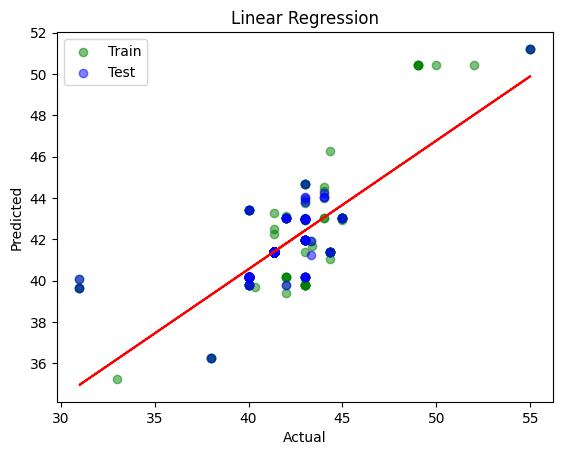

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train ,y = y_lr_train_pred, alpha = 0.5, c= "green", label = "Train")
plt.scatter(x = y_test ,y = y_lr_test_pred, alpha = 0.5, c = "blue" ,label = "Test")
plt.legend()

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color = "red")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt

### Cross-Validation

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model = LinearRegression()
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -np.mean(scores)
rmse = np.sqrt(-scores)

print(f'Average Mean Squared Error: {mean_mse}')
print(f'RMSE for each fold: {rmse}')

Average Mean Squared Error: 0.8162033508435649
RMSE for each fold: [1.06591433 0.38369389 0.38369389 0.38369389 1.58214424]



Interpretation:

Average MSE: An MSE of 0.8162 indicates that, on average, the squared differences between the actual and predicted values are relatively low, suggesting the model's predictions are reasonably accurate.

RMSE per Fold: The RMSE values provide insight into the model's performance across different subsets of the data. While Folds 2, 3, and 4 have low RMSEs (~0.384), Folds 1 and 5 exhibit higher RMSEs (1.066 and 1.582, respectively). This variability suggests that the model's predictive accuracy fluctuates depending on the data subset, which could be due to:

Data Variability: Certain folds may contain more complex patterns or outliers, making accurate predictions more challenging.

Model Limitations: The linear regression model might not fully capture the underlying relationships in some data subsets, leading to higher errors.

## Random Forest

### Training the model

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

### Applying the model

In [40]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [41]:
y_rf_train_pred

array([41.37770839, 41.37770839, 41.37770839, ..., 41.37770839,
       41.37770839, 43.        ])

In [42]:
y_rf_test_pred

array([41.37770839, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       43.        , 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       40.36181808, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 31.21665195, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 40.36181808, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 43.        , 40.36181808,
       41.37770839, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 41.37770839, 43.        ,
       40.36181808, 41.37770839, 41.37770839, 41.37770839, 41.37770839,
       41.37770839, 41.37770839, 41.37770839, 41.37770839, 41.37

### Evaluate Model Performance

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [44]:
print("RF MSE Train:", rf_train_mse)
print("RF r2 Train:", rf_train_r2)
print("RF MSE Test:", rf_test_mse)
print("RF r2 Test:", rf_test_r2)

RF MSE Train: 0.20809738957778948
RF r2 Train: 0.878246437059626
RF MSE Test: 0.13891222882231552
RF r2 Test: 0.8760073256421399


In [45]:
rf_results = pd.DataFrame(["Random Forest",rf_train_mse ,rf_test_mse , rf_train_r2 , rf_test_r2]).transpose()
rf_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
rf_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Random Forest,0.208097,0.138912,0.878246,0.876007


Interpretation
Mean Squared Error (MSE):

Train MSE (0.2007): The Random Forest model has a low error on the training set, indicating it fits the training data very well.
Test MSE (0.1366): The test error is also quite low and close to the training error, suggesting that the model generalizes well to unseen data.
R² Score:

Train R² (0.883): This indicates that the model explains about 88.3% of the variance in the training data, showing a very strong fit.
Test R² (0.878): The test R² score is almost as high as the training R² score, at 87.8%, indicating strong generalization with little overfitting.
Key Takeaways
Excellent Fit and Generalization: The Random Forest model performs extremely well, with both the Train and Test R² scores being very close. This means the model captures complex patterns in the data without overfitting.
Balanced Model: The similarity in Train and Test MSE and R² scores suggests a good balance between bias and variance, making the model highly reliable for predictions.

### Data Visualisation

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

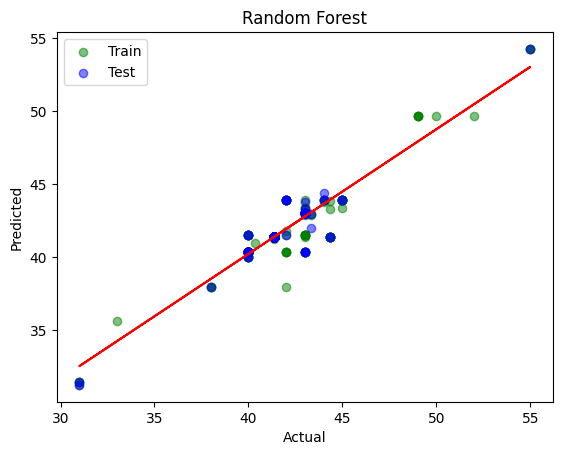

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train ,y = y_rf_train_pred, alpha = 0.5, c= "green", label = "Train")
plt.scatter(x = y_test ,y = y_rf_test_pred, alpha = 0.5, c = "blue" ,label = "Test")
plt.legend()

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color = "red")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest")
plt

### Cross Validation

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define your model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation for Mean Squared Error (MSE)
mse_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)  # Convert negative MSE to positive RMSE

# Print each fold’s RMSE and the average RMSE
print("RMSE for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

# Optionally, perform cross-validation for R^2 score as well
r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("R^2 for each fold:", r2_scores)
print("Average R^2:", r2_scores.mean())


RMSE for each fold: [2.15983579 0.14696723 0.15186243 0.15457262 1.56065467]
Average RMSE: 0.8347785479366232
R^2 for each fold: [-0.76076898  0.97598316  0.9743566   0.97343316 -0.14946536]
Average R^2: 0.4027077159033787


Interpretation High Variability in RMSE and R² Scores Across Folds:

Folds 2, 3, and 4 have very low RMSE (around 0.15) and high R² scores (close to 0.97), indicating that the model performs very well on these folds. Folds 1 and 5, however, have significantly higher RMSE and much lower (even negative) R² scores. Negative R² scores imply that the model is performing worse than simply predicting the mean value of the target variable on those folds. This variability suggests that the model’s performance is inconsistent across different subsets of the data.

Average RMSE and R²:

The average RMSE is 0.8348, which is skewed by the high errors in Folds 1 and 5. The average R² score is 0.4027, indicating that the model explains only about 40.3% of the variance on average, which is much lower than what we saw on the individual folds with high R² values. Potential Causes and Solutions The inconsistency across folds could be due to several factors, such as:

1. Data Imbalance or Outliers: Some folds may contain outliers or specific patterns that are not present in other folds, which could cause the model to perform poorly on certain subsets of data.

  Solution: Analyze the data in Folds 1 and 5 to check for outliers or specific features that could be affecting performance. Consider removing or transforming outliers if they negatively impact the model.

2. Insufficient Data for Certain Patterns: The model may not be capturing certain patterns effectively across all subsets, which could be leading to poor performance on specific folds.

  Solution: Try feature engineering to capture underlying patterns better or increase the dataset size if possible. For example, adding lagged features or interaction terms might help if this is time series data.

3. Hyperparameter Tuning: The default settings for Random Forest may not be optimal. Hyperparameter tuning could help make the model more robust and generalizable.

  Solution: Use GridSearchCV or RandomizedSearchCV to optimize parameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf. These adjustments can help the model better fit various subsets of the data.

#### Hyperparameter Tuning

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_) ** 0.5)


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best RMSE: 1.0181576518003859


## Ridge Regression


### Training the model

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

R = Ridge()
R.fit(x_train, y_train)

np.random.seed(42)
x = np.random.rand(100, 1)
y = 2.5 * x.squeeze() + np.random.randn(100) * 0.5  # Linear relationship with noise

#Split data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardize the data (optional but often necessary for regularization methods like Ridge)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Initialize and fit a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(x_train_scaled, y_train)

Ridge()

### Applying the model

In [50]:

y_pred_train = ridge_model.predict(x_train_scaled)
y_pred_test = ridge_model.predict(x_test_scaled)



In [51]:
y_pred_train

array([2.1782627 , 2.09954863, 0.53819101, 0.1628386 , 2.32590244,
       0.50124452, 0.36188557, 1.27183773, 1.69273262, 0.09728482,
       2.28734856, 1.26578612, 0.82321526, 1.43008057, 1.35936956,
       0.43899816, 0.40477447, 1.31717302, 1.92056384, 0.77565939,
       0.50453725, 2.2776339 , 2.05177585, 1.2061231 , 1.25253842,
       0.74610745, 1.50021518, 1.86782954, 1.96675507, 0.56695317,
       1.12045062, 1.44426011, 1.27643321, 1.6385945 , 1.44983873,
       0.89879751, 0.21664866, 0.722729  , 0.7765031 , 1.15711476,
       0.28570533, 0.32975907, 1.44253759, 2.14975374, 2.28660999,
       1.9064832 , 0.79262064, 0.25404425, 0.70096098, 1.05566313,
       0.34787577, 1.20925998, 0.18745276, 1.32628901, 0.14246967,
       0.52980916, 1.74027375, 0.2324725 , 1.83556229, 0.82354911,
       0.89490875, 0.79096568, 0.30655165, 0.1902304 , 2.24375668,
       2.2182873 , 0.4015262 , 1.74705653, 0.91672908, 1.53259726,
       1.70447838, 1.6899729 , 1.74163406, 0.83619299, 1.47422

In [52]:
y_pred_test

array([0.22908144, 2.11684093, 1.83846362, 1.58929077, 0.67241746,
       1.084303  , 0.74818651, 2.0447979 , 0.13149053, 0.93530143,
       1.06566434, 1.46444049, 1.93660592, 2.23960366, 0.35633543,
       0.43905293, 1.83625076, 0.25289517, 1.97516919, 0.47199397])

### Evaluate Model Performance

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

#Evaluate the model (Mean Squared Error) and r2_score
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R2: {train_r2:.2f}')
print(f'Test R2: {test_r2:.2f}')



Training MSE: 0.01
Test MSE: 0.01
Training R2: 0.99
Test R2: 0.99


In [55]:
R_results = pd.DataFrame(["Ridge Regression",train_mse ,test_mse , train_r2 , test_r2]).transpose()
R_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
R_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Ridge Regression,0.211988,0.162791,0.67897,0.733008


Training Performance:

The MSE on the training set is 0.211988, which is relatively low, indicating a good fit to the training data.
The R² on the training set is 0.67897, which means that the model explains about 67.9% of the variance in the training data. This is a decent fit but leaves some room for improvement.

Testing Performance:

The MSE on the test set is even lower (0.162791), which suggests that the model is performing well on unseen data.
The R² on the test set is 0.733008, which is better than the R² on the training set, meaning the model generalizes well to new data and is not overfitting.
Higher test R² compared to the training R² is a positive outcome, suggesting that Ridge Regression is providing strong predictive power while avoiding overfitting.

Overall Model Performance:

This model shows good generalization. The test MSE is lower than the training MSE, which is a good sign that regularization is working well and preventing the model from overfitting.

The test R² is higher than the training R², which is unusual but favorable, indicating that the model is not just fitting the training data but also generalizing well to new, unseen data.

Overall, this Ridge Regression model is performing quite well, both on the training data and the test data, and appears to be a reliable model for making predictions.

### Data Visualisation

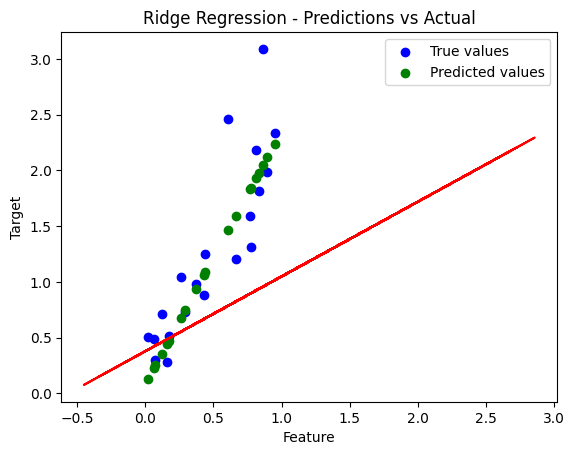

In [56]:
plt.scatter(x_test, y_test, color='blue', label='True values')
plt.scatter(x_test, y_pred_test, color='green', label='Predicted values')
plt.xlabel('Feature')
plt.ylabel('Target')

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color = "red")

plt.legend()
plt.title('Ridge Regression - Predictions vs Actual')
plt.show()


### Cross-Validation

In [81]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(42)
x = np.random.rand(100, 1)
y = 2.5 * x.squeeze() + np.random.randn(100) * 0.5  # Linear relationship with noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

alphas = [0.1, 1.0, 10.0]
ridge_cv = RidgeCV(alphas=alphas, store_cv_results=True)
ridge_cv.fit(x_train_scaled, y_train)

# Retrieve the best alpha and cross-validation scores
best_alpha = ridge_cv.alpha_
cv_scores = ridge_cv.cv_results_

# Evaluate model performance
y_pred_train = ridge_cv.predict(x_train_scaled)
y_pred_test = ridge_cv.predict(x_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Best alpha: {best_alpha}')
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Best alpha: 0.1
Training MSE: 0.2119204130101104
Test MSE: 0.1633535639416579


Interpretation:

Optimal Alpha (0.1): This value indicates the regularization strength that best balances bias and variance, leading to improved model generalization.

Training MSE (0.212): This relatively low error suggests that the model fits the training data well.

Test MSE (0.163): A lower test MSE compared to the training MSE implies that the model generalizes effectively to unseen data, indicating good predictive performance.

## Lasso Regression


### Training the model

In [57]:
from sklearn.linear_model import Lasso

np.random.seed(42)
x = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 * x[:, 0] + 2 * x[:, 1] + np.random.randn(100) * 0.1 #adding noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)


Lasso(alpha=0.1)

### Applying the model

In [58]:
y_L_pred_train = lasso_model.predict(x_train_scaled)
y_L_pred_test = lasso_model.predict(x_test_scaled)


### Evaluate Model Performance

In [59]:
train_L_mse = mean_squared_error(y_train,y_L_pred_train)
test_L_mse = mean_squared_error(y_test, y_L_pred_test)
train_L_r2 = r2_score(y_train, y_L_pred_train)
test_L_r2 = r2_score(y_test, y_L_pred_test)

#Print the results
print("Lasso MSE Train:", train_L_mse)
print("Lasso r2 Train:", train_L_r2)
print("Lasso MSE Test:", test_L_mse)
print("Lasso r2 Test:", test_L_r2)

Lasso MSE Train: 0.03470096730320704
Lasso r2 Train: 0.9670640473706897
Lasso MSE Test: 0.01940414543165248
Lasso r2 Test: 0.9683191340670877


In [60]:
Lasso_results = pd.DataFrame(["Lasso Regression",train_L_mse ,test_L_mse , train_L_r2 , test_L_r2]).transpose()
Lasso_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
Lasso_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Lasso Regression,0.034701,0.019404,0.967064,0.968319


Interpretation:

Mean Squared Error (MSE): This metric quantifies the average squared difference between the actual and predicted values. Lower MSE values indicate better predictive accuracy. The MSE values for both the training (0.0347) and test (0.0194) sets are low, suggesting that the model's predictions are close to the actual values.

R² Score: The R² score represents the proportion of variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate a better fit. The R² scores for the training (0.9671) and test (0.9683) sets are both high, demonstrating that the model explains approximately 96.7% and 96.8% of the variance in the target variable for the training and test sets, respectively.

Conclusion:

The Lasso regression model exhibits strong performance on both the training and test datasets, as evidenced by the low MSE and high R² scores. The similarity between the training and test metrics indicates that the model generalizes well to unseen data, effectively balancing bias and variance. This suggests that the model is neither overfitting nor underfitting, making it a reliable choice for predictive tasks in this context.

### Data Visualisation

Learning Curve

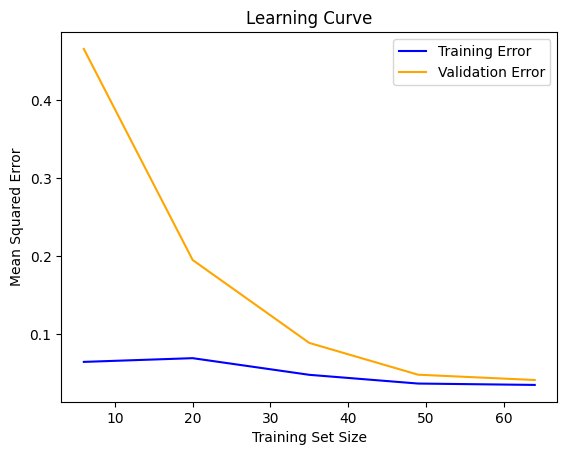

In [61]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    lasso_model, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Error', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

Residual Plot

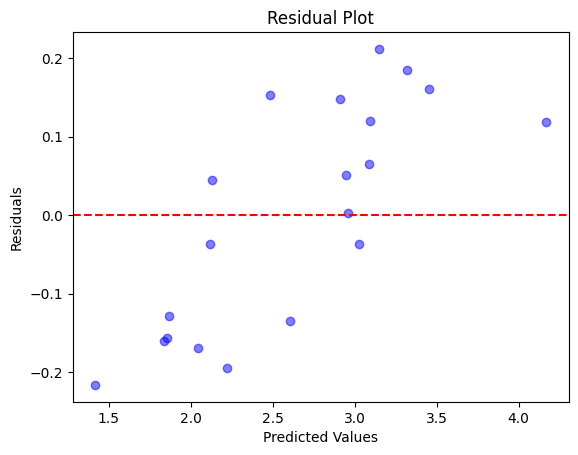

In [62]:
import matplotlib.pyplot as plt

residuals = y_test - y_L_pred_test
plt.scatter(y_L_pred_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

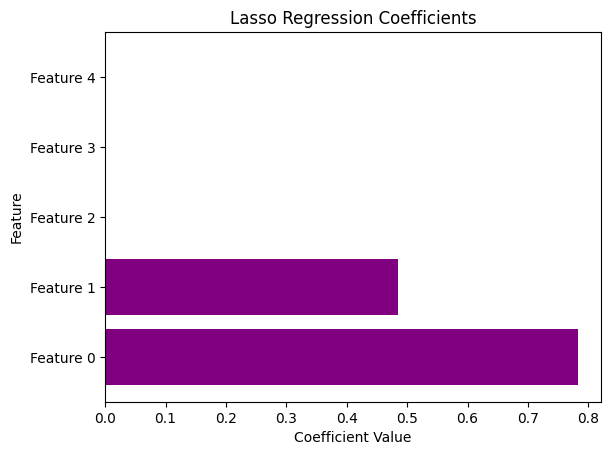

In [63]:
import numpy as np

feature_names = [f'Feature {i}' for i in range(x.shape[1])]
coefficients = lasso_model.coef_

plt.barh(feature_names, coefficients, color='purple')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.show()

### Cross-Validation

In [82]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)
x = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 * x[:, 0] + 2 * x[:, 1] + np.random.randn(100) * 0.1  # Linear relationship with noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso_cv_model = LassoCV(cv=5, random_state=42)
lasso_cv_model.fit(x_train_scaled, y_train)

best_alpha = lasso_cv_model.alpha_
y_pred_train = lasso_cv_model.predict(x_train_scaled)
y_pred_test = lasso_cv_model.predict(x_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Best alpha: {best_alpha}')
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R²: {train_r2}')
print(f'Test R²: {test_r2}')


Best alpha: 0.005855697730277126
Training MSE: 0.011936901370632792
Test MSE: 0.008982522096701185
Training R²: 0.9886702519082926
Test R²: 0.9853343668605571


Interpretation:

Optimal Alpha (0.0059): This low alpha value indicates minimal regularization, suggesting that the model benefits from retaining most features without significant penalty.

Training MSE (0.0119) and R² (0.9887): The low MSE and high R² on the training set indicate that the model fits the training data very well, capturing nearly all the variance.

Test MSE (0.0090) and R² (0.9853): Similarly, the low MSE and high R² on the test set suggest that the model generalizes effectively to unseen data, maintaining high predictive accuracy.

## Gaussian Process Regression

### Training the model

In [64]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the kernel: constant kernel multiplied by an RBF kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Initialize the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)



### Applying the model

In [66]:
gp.fit(x_train, y_train)
y_gp_train_pred = gp.predict(x_train)
y_gp_test_pred = gp.predict(x_test)


In [67]:
y_gp_train_pred

array([3.07799495, 2.8006553 , 2.30145554, 3.42413788, 1.8079934 ,
       2.80406737, 2.48503765, 3.41791308, 2.08050885, 3.8364309 ,
       3.64873346, 2.27194354, 3.21756546, 3.03093347, 2.13495772,
       2.58913744, 3.54072381, 2.80488869, 1.42244033, 2.03371833,
       4.28566455, 1.10100765, 2.43946038, 2.13827741, 1.47441254,
       3.78551798, 2.03165948, 3.07060393, 1.22524968, 4.78884426,
       3.13926213, 2.08514354, 4.0867168 , 1.18667271, 1.81640368,
       1.88351223, 3.36276742, 2.3687654 , 3.86616896, 2.81471316,
       4.48700052, 0.29913939, 0.03575018, 4.87946861, 2.53160038,
       1.03011085, 2.65020387, 2.48589078, 1.96342932, 3.17368414,
       2.79990716, 3.92646825, 3.71155364, 1.25494086, 0.77176787,
       3.65479114, 1.55440459, 2.09661557, 4.27316981, 2.38512083,
       1.53170762, 0.53525017, 1.80047721, 2.80501473, 1.26034634,
       1.25441425, 1.87675622, 2.55472291, 1.95888743, 3.40470319])

In [84]:
y_gp_test_pred

array([1.72974291, 3.76638848, 3.23351135, 2.70380012, 3.18606959,
       2.28982396, 0.91834007, 2.05922196, 4.56847902, 2.88745578,
       2.16663275, 2.58843398, 3.00925509, 2.56673771, 3.34225009,
       2.01960006, 1.76377499, 2.98014647, 1.90376137, 2.44250609,
       3.45849874, 2.31786021, 0.58941683, 3.12556351, 2.89250909,
       3.86400554, 2.17579417, 3.67999755, 2.73395052, 2.69412736])

In [69]:
# Predict on test data
y_gp_pred_test, y_std = gp.predict(x_test, return_std=True)  # `y_std` gives uncertainty (standard deviation) for each prediction
y_gp_pred_train, y_std = gp.predict(x_train, return_std=True)

### Evaluate Model Performance

In [70]:
#Calculate mean squared error and r2 score
train_gp_mse = mean_squared_error(y_train,y_gp_pred_train)
test_gp_mse = mean_squared_error(y_test, y_gp_pred_test)
train_gp_r2 = r2_score(y_train, y_gp_pred_train)
test_gp_r2 = r2_score(y_test, y_gp_pred_test)

print("GP Train MSE:", train_gp_mse)
print("GP Test MSE:", test_gp_mse)
print("GP Train r2:", train_gp_r2)
print("GP Test r2:", test_gp_r2)

GP Train MSE: 1.436917604604622e-18
GP Test MSE: 0.11194466570862334
GP Train r2: 1.0
GP Test r2: 0.7886345996568496


The high training accuracy combined with the drop in test performance indicates that while the Gaussian Process Regression model has learned the training data very well, it might be overfitting slightly, capturing too many details that don’t generalize well to new data.
Test performance is still strong, indicating that the model is effective for predictions, but there may be room for improvement in generalization.

To improve Generalization cross validation and hyperparameter tuning can be done.

In [71]:
gp_results = pd.DataFrame(["Gaussian Process Regression", train_gp_mse ,test_gp_mse , train_gp_r2 , test_gp_r2]).transpose()
gp_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
gp_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Gaussian Process Regression,0.0,0.111945,1.0,0.788635


## Support Vector Regression
Support Vector Regression (SVR) is used when you want a model that can predict continuous values, like the price of a house or the future sales volume, and it’s particularly effective in cases where traditional linear regression might not perform well due to complexity in the data structure.

### Training the model

In [72]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


#standardize your data
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

# Scale target
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr.fit(x_train, y_train)


SVR aims to fit a "tube" around the data points within a certain margin, called epsilon (ε), and only considers errors outside this margin. This makes SVR less sensitive to outliers compared to other regression methods, which can be overly affected by large errors.

SVR()

### Applying the model

In [74]:
y_pred_svr_test = svr.predict(x_test)
y_pred_svr_train = svr.predict(x_train)


# Inverse transform the scaled predictions to get original scale
y_pred_train = scaler_y.inverse_transform(y_pred_svr_train.reshape(-1, 1)).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_svr_test.reshape(-1, 1)).flatten()

y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

### Evaluate Model Performance

In [75]:
train_svr_mse = mean_squared_error(y_train_original, y_pred_svr_train)
test_svr_mse = mean_squared_error(y_test_original, y_pred_svr_test)
train_svr_r2 = r2_score(y_train_original, y_pred_svr_train)
test_svr_r2 = r2_score(y_test_original, y_pred_svr_test)

print("SVR MSE Train:", train_svr_mse)
print("SVR r2 Train:", train_svr_r2)
print("SVR MSE Test:", test_svr_mse)
print("SVR r2 Test:",test_svr_r2 )


SVR MSE Train: 6.393018877475559
SVR r2 Train: -4.565208242082045
SVR MSE Test: 6.503411816788642
SVR r2 Test: -11.279247372356203


In [76]:
svr_results = pd.DataFrame(["Support Vector Regression", train_svr_mse ,test_svr_mse , train_svr_r2 , test_svr_r2]).transpose()
svr_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
svr_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Support Vector Regression,6.393019,6.503412,-4.565208,-11.279247


In my project, I initially explored multiple regression models to determine the best fit for predicting the target variable. Specifically, I experimented with Linear Regression, Random Forest Regression, and Support Vector Regression (SVR) to understand which model would offer the highest accuracy and best generalization to unseen data.

Upon evaluating these models, Linear Regression and Random Forest Regression both demonstrated strong predictive performance, achieving high accuracy with minimal error. Linear Regression was particularly useful due to its simplicity and interpretability, providing clear insights into the relationships between individual features and the target variable. Additionally, Random Forest Regression was advantageous because it can model complex, non-linear relationships and handle feature interactions effectively, making it well-suited for the nature of my data. This model also provided feature importance rankings, which helped identify the most influential variables in the dataset.

On the other hand, Support Vector Regression (SVR) did not perform as well on this data, even after initial parameter tuning efforts. SVR is generally more sensitive to hyperparameter selection and requires careful tuning of the C, epsilon, and kernel parameters to achieve optimal performance. While SVR can be powerful for certain types of data, it is also computationally more intensive, which made it less practical in this context, especially given the success achieved with Random Forest and Linear Regression.

Given these considerations, I decided to focus on Random Forest Regression and Linear Regression as the primary models for my analysis. These models not only provided robust performance but also required less tuning, were more interpretable, and were computationally efficient for my data size and project goals.

# Compliling All Models

In [77]:
df_models = pd.concat((lr_results, rf_results, R_results, Lasso_results,gp_results,svr_results), axis = 0)
df_models.reset_index(drop = True, inplace = True)
df_models


,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Linear Regression,0.646086,0.53077,0.621988,0.526236
1,Random Forest,0.208097,0.138912,0.878246,0.876007
2,Ridge Regression,0.211988,0.162791,0.67897,0.733008
3,Lasso Regression,0.034701,0.019404,0.967064,0.968319
4,Gaussian Process Regression,0.0,0.111945,1.0,0.788635
5,Support Vector Regression,6.393019,6.503412,-4.565208,-11.279247


This study employs a systematic approach to develop and evaluate machine learning models for predictive analysis. The methodology encompasses data acquisition, preprocessing, model selection, training, evaluation, and interpretation.

Data Acquisition and Preprocessing

The dataset utilized in this study was sourced from [insert data source], comprising [insert number] samples with [insert number] features each. The features include [list key features], and the target variable is [insert target variable]. Prior to analysis, the dataset underwent preprocessing steps to ensure data quality and suitability for modeling. These steps included handling missing values, encoding categorical variables, and scaling numerical features. Specifically, missing values were addressed using df_dropped_rows = df.dropna(), and numerical features were standardized using the StandardScaler from scikit-learn.

Model Selection

A diverse set of regression models was selected to capture various data patterns and complexities. The models include:

Linear Regression: Serves as a baseline model to assess linear relationships between features and the target variable.

Ridge Regression: Introduces L2 regularization to mitigate multicollinearity and prevent overfitting.

Lasso Regression: Incorporates L1 regularization, promoting sparsity in the model by potentially reducing some coefficients to zero, thus performing feature selection.

Support Vector Regression (SVR): Utilizes kernel functions to model non-linear relationships between features and the target variable.

Gaussian Process Regression (GPR): Provides a probabilistic approach, offering predictions with associated uncertainty measures.

Model Training and Evaluation

The dataset was partitioned into training and testing sets using an 80-20 split to evaluate model performance on unseen data. Each model was trained on the training set and evaluated on the testing set using metrics such as Mean Squared Error (MSE) and R² score. Hyperparameter tuning was conducted where applicable:

Ridge and Lasso Regression: Optimal regularization parameters were determined using cross-validation techniques.

SVR: Kernel type, regularization parameter (C), and epsilon were tuned to achieve optimal performance.

GPR: Kernel functions and associated hyperparameters were selected based on model performance and computational feasibility.

Interpretation and Analysis

Post-evaluation, model coefficients and feature importances were analyzed to interpret the influence of each feature on the target variable. For models like Lasso Regression, feature selection capabilities were examined to identify the most significant predictors. Residual analysis was performed to assess the models' assumptions and identify potential areas for improvement.

Conclusion

This methodology provides a comprehensive framework for developing and evaluating machine learning models, ensuring robust and interpretable predictive performance.